In [160]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [161]:
# plotting function - can be ignored
def plot_transform(ax, xs, ys):
    
    colors = ['m', 'g', 'r', 'b']
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -3, 3, -3, 3
    ticks_frequency = 1
    # plot points
    ax.scatter(xs, ys, c=colors, s=80)

    # Draw lines connecting points to form a rectangle
    ax.plot(np.append(xs, xs[0]), np.append(ys, ys[0]), c='black', ls='-', lw=1.5) # we also draw a line between the last and the first element

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)



In [162]:
#define points
xs = np.array([-1, -1, 1, 1])
ys = np.array([1, -1, -1, 1])
ws = np.array([ 1, 1, 1, 1])
points = np.concatenate((xs, ys, ws)).reshape((3, 4), order='A')


In [163]:
# isometry transformation

e = 1 # -1 for reflection
alpha_deg = 90 # rotation angle counter clockwise in degrees
tx = 1 # x and y translation
ty = 2
##
a = (alpha_deg/180)*np.pi # angle in radians

T_iso = np.array([[e*math.cos(a), -math.sin(a), tx],
              [e*math.sin(a), math.cos(a), ty], 
              [0, 0, 1]])

In [168]:
# Similarity transformation

e = 1 # -1 for reflection
alpha_deg = 0 # rotation angle counter clockwise in degrees
tx = 0 # x and y translation
ty = 0
s = 2 # for scaling
##
a = (alpha_deg/180)*np.pi # angle in radians

T_sim = np.array([[e*s*math.cos(a), -s*math.sin(a), tx],
              [e*s*math.sin(a), s*math.cos(a), ty], 
              [0, 0, 1]])

T_sim

array([[ 2., -0.,  0.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  1.]])

In [165]:
# Affinity transformation

l1 = 2
l2 = 1

phi_rot_deg = 45 # rotation angle of the scaling  
theta_rot_deg = 45 # rotation angle counter clockwise in degrees
tx = 0 # x and y translation
ty = 0

##
t = (theta_rot_deg/180)*np.pi # angle in radians
p = (phi_rot_deg/180)*np.pi # angle in radians

# construct rotation matrices:

# the overall orientation
R_theta = np.array([[math.cos(t), -math.sin(t)],
              [e*math.sin(t), math.cos(t)]])

# the orientation of the non-uniform scaling
R_phi = np.array([[math.cos(p), -math.sin(p)],
              [e*math.sin(p), math.cos(p)]])

# the scaling matrix
D = np.array([[l1, 0],
              [0, l2]])

# A = R(t)*R(-p)*D*R(p). We use the transpose of R(p) as this is equivalent to R(-p) 
A = np.dot(R_theta, np.dot(R_phi.transpose(), np.dot(D, R_phi)))

T_affine[0:2,0:2] = A
T_affine[0,2] = tx
T_affine[1,2] = ty
T_affine[2,2] = 1

T_affine

array([[ 1.41421356, -1.41421356,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [166]:
# Projective transformation

l1 = 2
l2 = 1

phi_rot_deg = 45 # rotation angle of the scaling  
theta_rot_deg = 45 # rotation angle counter clockwise in degrees
tx = 0 # x and y translation
ty = 0

v1 = 0.2
v2 = 0.2
v = 2

##
t = (theta_rot_deg/180)*np.pi # angle in radians
p = (phi_rot_deg/180)*np.pi # angle in radians

# construct rotation matrices:

# the overall orientation
R_theta = np.array([[math.cos(t), -math.sin(t)],
              [e*math.sin(t), math.cos(t)]])

# the orientation of the non-uniform scaling
R_phi = np.array([[math.cos(p), -math.sin(p)],
              [e*math.sin(p), math.cos(p)]])


# the scaling matrix
D = np.array([[l1, 0],
              [0, l2]])

# A = R(t)*R(-p)*D*R(p). We use the transpose of R(p) as this is equivalent to R(-p) 
A = np.dot(R_theta, np.dot(R_phi.transpose(), np.dot(D, R_phi)))

T_proj = np.zeros((3,3))
T_proj[0:2,0:2] = A
T_proj[0,2] = tx
T_proj[1,2] = ty
T_proj[2,0] = v1
T_proj[2,1] = v2
T_proj[2,2] = v

T_proj

array([[ 1.41421356, -1.41421356,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.2       ,  0.2       ,  2.        ]])

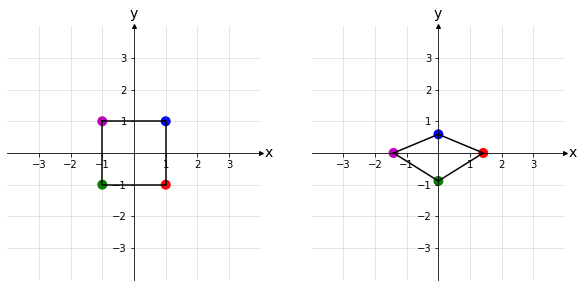

In [167]:
# here you can choose which transformation to apply
#points_transformed = np.dot(T_iso, points) # isometry
#points_transformed = np.dot(T_sim, points) # similarity
#points_transformed = np.dot(T_affine, points) # affinity
points_transformed = np.dot(T_proj, points) # homography

# get back normalized coordinates
points[2,:]

xs_transformed = points_transformed[0,:] / points_transformed[2,:]
ys_transformed = points_transformed[1,:] / points_transformed[2,:]

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
plot_transform(ax1, xs, ys)
plot_transform(ax2, xs_transformed, ys_transformed)
plt.show()